In [0]:
import pandas as pd
import numpy as np

#Fonte de dados: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

In [2]:
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
casos.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
496,NaN,Jersey,49.1900,-2.110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
500,NaN,The Gambia,13.4667,-16.600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0



# CASOS COVID-19 NO MUNDO

In [0]:
casos.shape

(487, 65)

In [3]:
casos = np.sum( casos.iloc[ : , 4:casos.shape[1]] )  
casos.index = pd.DatetimeIndex(casos.index)
casos.tail()

2020-03-19    242708.0
2020-03-20    272166.0
2020-03-21    304524.0
2020-03-22    335955.0
2020-03-23    336004.0
dtype: float64

In [0]:
casos.shape

(60,)

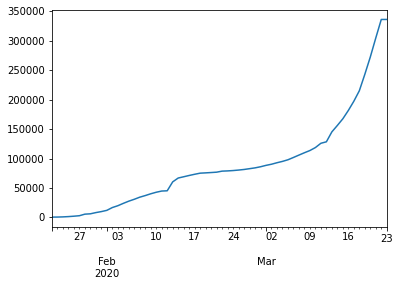

In [4]:
casos.plot()

## ANALISANDO DADOS DAS MORTES

In [5]:
mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
mortes.shape

(501, 66)

In [6]:
mortes = np.sum( mortes.iloc[ : , 4:mortes.shape[1]] )  
mortes.index = pd.DatetimeIndex(casos.index)
mortes.tail()

2020-03-19     9867.0
2020-03-20    11299.0
2020-03-21    12973.0
2020-03-22    14632.0
2020-03-23    14643.0
dtype: float64

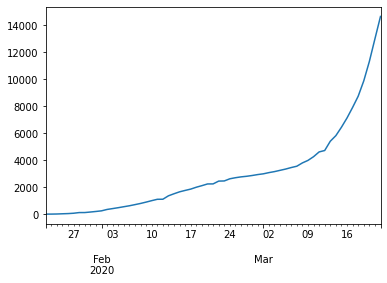

In [0]:
mortes.plot()

In [8]:
mortalidade = (mortes/casos)*100
mortalidade.shape

(62,)

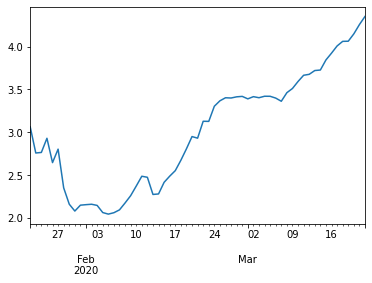

In [0]:
mortalidade.plot()

## ANALISANDO DADOS DOS RECUPERADOS

In [9]:
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')
recuperados.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
496,NaN,Jersey,49.1900,-2.110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.556,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
500,NaN,The Gambia,13.4667,-16.600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [0]:
recuperados.shape

(482, 64)

In [0]:
recuperados = np.sum(recuperados.iloc[:, 4:recuperados.shape[1]])
recuperados.index = pd.DatetimeIndex(recuperados.index)

In [0]:
recuperados.tail()

2020-03-18    83207
2020-03-19    84854
2020-03-20    87256
2020-03-21    91499
2020-03-22    97704
dtype: int64

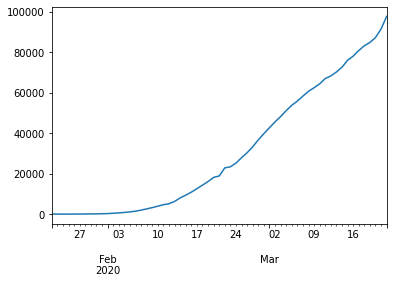

In [0]:
recuperados.plot()

##CASOS ATIVOS

In [0]:
ativos = casos - (recuperados)

In [0]:
ativos.tail()

2020-03-18    131703
2020-03-19    157854
2020-03-20    184910
2020-03-21    213025
2020-03-22    238251
dtype: int64

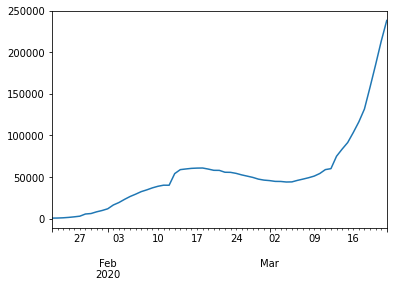

In [0]:
ativos.plot()

In [0]:
df = pd.concat([casos,ativos,recuperados,mortes], axis=1) #trocando o eixo da concatenação

In [13]:

df.columns = (['casos','ativos','recuperados','mortes'])
df.tail()

,casos,ativos,recuperados,mortes
2020-03-19,242708.0,157854.0,84854.0,9867.0
2020-03-20,272166.0,184910.0,87256.0,11299.0
2020-03-21,304524.0,213025.0,91499.0,12973.0
2020-03-22,335955.0,238251.0,97704.0,14632.0
2020-03-23,336004.0,237670.0,98334.0,14643.0


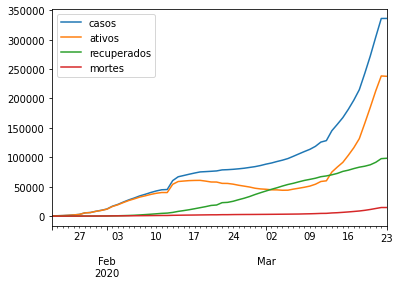

In [14]:
df.plot()

#Trabalhando com o PROPHET para predições

In [0]:
from fbprophet import Prophet

O Prohphet espera que o dataframe possua duas colunas com os seguintes nomes: ds, no formato data e y, valor numérico que desejamos prever

In [0]:
mortes

2020-01-22       17
2020-01-23       18
2020-01-24       26
2020-01-25       42
2020-01-26       56
2020-01-27       82
2020-01-28      131
2020-01-29      133
2020-01-30      171
2020-01-31      213
2020-02-01      259
2020-02-02      362
2020-02-03      426
2020-02-04      492
2020-02-05      564
2020-02-06      634
2020-02-07      719
2020-02-08      806
2020-02-09      906
2020-02-10     1013
2020-02-11     1113
2020-02-12     1118
2020-02-13     1371
2020-02-14     1523
2020-02-15     1666
2020-02-16     1770
2020-02-17     1868
2020-02-18     2007
2020-02-19     2122
2020-02-20     2247
2020-02-21     2251
2020-02-22     2458
2020-02-23     2469
2020-02-24     2629
2020-02-25     2708
2020-02-26     2770
2020-02-27     2814
2020-02-28     2872
2020-02-29     2941
2020-03-01     2996
2020-03-02     3085
2020-03-03     3160
2020-03-04     3254
2020-03-05     3348
2020-03-06     3460
2020-03-07     3558
2020-03-08     3802
2020-03-09     3988
2020-03-10     4262
2020-03-11     4615


In [0]:
mortes.plot()

NameError: ignored

In [0]:
mortes = mortes.reset_index()